In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

### Overview
| Category | Model | Description | MAE | MASE
|-----------|--------|-------------|-------------|-------------|
| Baseline | **Naïve Forecast** | Yesterday’s value as today’s forecast |  87.826087 | 	0.923230
| Baseline | **Moving Average** | Mean of previous `k` days |86.347826 | 	0.907691
| Statistical | **ARIMA** | Classic autoregressive integrated moving average |  |
| Machine Learning | **XGBoost** | Gradient boosting on lag/time-based features |  |
| Deep Learning | **LSTM** | Neural network specialized for sequential patterns |  |
---

### Evaluation Metric: Mean Absolute Scaled Error (MASE)
*Normalizes forecast errors relative to a naïve model*

$\text{MASE} = \frac{\text{MAE}_{forecast}}{\text{MAE}_{naive}}$

- **MASE < 1**: better than the naïve forecast  
- **MASE = 1**: same as naïve forecast  
- **MASE > 1**: worse than naïve forecast  

---


In [2]:
df = pd.read_csv("call-center-data-v2-daily-cleaned.csv", parse_dates=["Date"])
df = df.sort_values("Date")
df.set_index("Date", inplace=True)

In [3]:
y = df["Incoming Calls"]

train = y.loc[:"2025-02-28"]
test = y.loc["2025-03-01":"2025-05-31"]

Train range: 2022-01-01 00:00:00 to 2025-02-28 00:00:00
Test range: 2025-03-01 00:00:00 to 2025-05-31 00:00:00


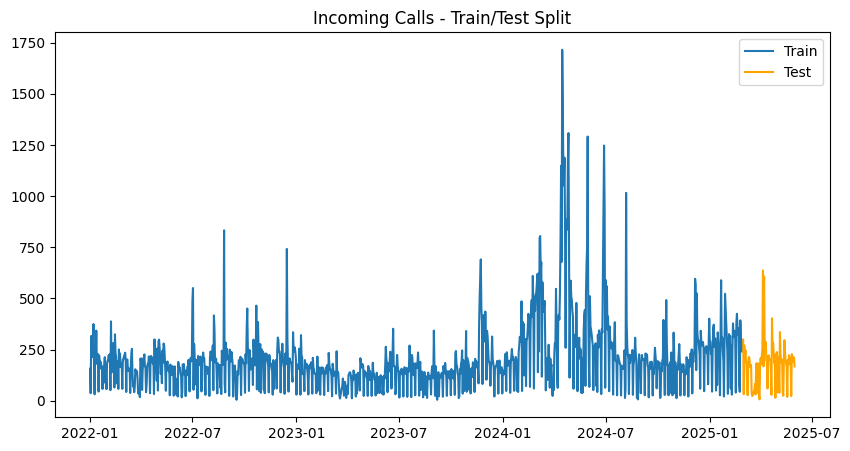

In [4]:
print("Train range:", train.index.min(), "to", train.index.max())
print("Test range:", test.index.min(), "to", test.index.max())

plt.figure(figsize=(10, 5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="orange")
plt.title("Incoming Calls - Train/Test Split")
plt.legend()
plt.show()

In [5]:
# MASE Metric
def mase(y_true, y_pred, y_train):
    naive_forecast = y_train.shift(1).dropna()
    mae_naive = mean_absolute_error(y_train[1:], naive_forecast)
    mae_forecast = mean_absolute_error(y_true, y_pred)
    return mae_forecast / mae_naive

In [6]:
# Naive Forecast
naive_pred = test.shift(1).fillna(method="bfill")
mae_naive = mean_absolute_error(test, naive_pred)
mase_naive = mase(test, naive_pred, train)

print(f"Naive MASE: {mase_naive:.3f}")

Naive MASE: 0.923


In [7]:
# Moving Average (Past 7 Days)
window = 7
movavg_pred_7 = test.copy()
movavg_pred_7[:] = train.rolling(window).mean().iloc[-1]
mae_movavg_7 = mean_absolute_error(test, movavg_pred_7)
mase_movavg_7 = mase(test, movavg_pred_7, train)

print(f"Moving Average MASE (7 Days): {mase_movavg_7:.3f}")

Moving Average MASE (7 Days): 0.908


In [8]:
# Moving Average (Past 3 Days)
window = 3
movavg_pred_3 = test.copy()
movavg_pred_3[:] = train.rolling(window).mean().iloc[-1]
mae_movavg_3 = mean_absolute_error(test, movavg_pred_3)
mase_movavg_3 = mase(test, movavg_pred_3, train)

print(f"Moving Average MASE (3 Days): {mase_movavg_3:.3f}")

Moving Average MASE (3 Days): 1.221


In [9]:
# Moving Average (Past 14 Days)
window = 14
movavg_pred_14 = test.copy()
movavg_pred_14[:] = train.rolling(window).mean().iloc[-1]
mae_movavg_14 = mean_absolute_error(test, movavg_pred_14)
mase_movavg_14 = mase(test, movavg_pred_14, train)

print(f"Moving Average MASE (14 Days): {mase_movavg_14:.3f}")

Moving Average MASE (14 Days): 1.211


In [10]:
# Moving Average (Past 21 Days)
window = 21
movavg_pred_21 = test.copy()
movavg_pred_21[:] = train.rolling(window).mean().iloc[-1]
mae_movavg_21 = mean_absolute_error(test, movavg_pred_21)
mase_movavg_21 = mase(test, movavg_pred_21, train)

print(f"Moving Average MASE (21 Days): {mase_movavg_21:.3f}")

Moving Average MASE (21 Days): 1.208


In [11]:
# Moving Average (Past 30 Days)
window = 30
movavg_pred_30 = test.copy()
movavg_pred_30[:] = train.rolling(window).mean().iloc[-1]
mae_movavg_30 = mean_absolute_error(test, movavg_pred_30)
mase_movavg_30 = mase(test, movavg_pred_30, train)

print(f"Moving Average MASE (30 Days): {mase_movavg_30:.3f}")

Moving Average MASE (30 Days): 1.134


In [ ]:
results = pd.DataFrame(
    {
        "Model": [
            "Naive",
            "Moving Average - 7",
            "Moving Average - 30",
            "Moving Average - 3",
            "Moving Average - 14",
            "Moving Average - 21",
        ],
        "MAE": [
            mae_naive,
            mae_movavg_7,
            mae_movavg_30,
            mae_movavg_3,
            mae_movavg_14,
            mae_movavg_21,
        ],
        "MASE": [
            mase_naive,
            mase_movavg_7,
            mase_movavg_30,
            mase_movavg_3,
            mase_movavg_14,
            mase_movavg_21,
        ],
    }
).sort_values("MASE")

print("Model Evaluation Overview")
display(results)

Model Evaluation Overview


,Model,MAE,MASE
1,Moving Average (7 Days),86.347826,0.907691
0,Naive,87.826087,0.923230
2,Moving Average (30 Days),107.873188,1.133966
5,Moving Average (21 Days),114.878882,1.207610
4,Moving Average (14 Days),115.166149,1.210630
3,Moving Average (3 Days),116.181159,1.221300
